# Model selection by cross-validation

We will do 10-fold cross-validation.

In [1]:
library(ISLR)
Hitters <- na.omit(Hitters)

# install.packages("leaps")
library(leaps)

In [6]:
# This was a little tedious - not having a predict method for `regsubsets`. So we will write one.

predict.regsubsets <- function(object, newdata, id, ...) {
    # reg subset objects got a component called a call that's the call
    # that was used to create it and part of the call is
    # a formula which we extract here.
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id = id)
    xvars <- names(coefi)
    mat[, xvars] %*% coefi
}

In [8]:
k <- 10
n <- nrow(Hitters)
set.seed(1)
# Generates a vector of 1 to 10 repeated nrow(Hitters) times, so that
# the vector has length equal to the number of rows in the Hitters data frame.
# This is done so that each row of the data frame is assigned to one of the 10 folds.
# So that'll try and make an equal number of ones, twos, up to equal number of 10s.
# And then we're going to random basically, shuffle that among our observations.
folds <- sample(rep(1:k, length = n))
folds
# See it's pretty balanced.
table(folds)


[1]  7  9  7  5  9  3  7  5  7 10  9  5  4  6  6  9  2  7  3  4  3 10  4  2  6
 [26]  1  8  6 10  4  1  7  2  3 10  7  5  9  8  2  9  9 10  4  4 10  4 10  5  6
 [51]  2  6  3  5  4  1  8  9  3  5  3  3  6  8  3  4  4  5  9  1 10  6  8  8  5
 [76]  5  9  1  2  5  3  2  3  8 10 10  7  4  6 10  1  1  8  2  3  6  3  5  2  8
[101]  3  9  2  1  2  9  1  9  8  1  6  8  6  7  1  3  6  1  5  9  3  4  9  6  4
[126]  4 10  5  8  5 10  3  3 10  4  5  2  5 10  4  4  7  9  8  6  9  7  8  4  6
[151]  5  4  6 10  9 10  6  1  9  7  2  2 10  9  2  3  5  4  3  2  5  7  5  2  8
[176]  7  3  7  7  5  1  4  2  6  1  8  2  1  7  1  7  1  2 10  3 10 10  6  6  7
[201]  2  8  6  1  2  2  5  7  5  1  8  6  4  7  4  3  5  6  7  2  6  2 10  9 10
[226]  3  1  8  7  7  4  1  9  9  1  9  8  7  8  2  1  9 10  3  4  1  4  8 10  9
[251]  1  8  8  7  6  8  3  2  8  5 10  1  3

folds
 1  2  3  4  5  6  7  8  9 10 
27 27 27 26 26 26 26 26 26 26 

In [13]:
# Make a matrix for our errors of 10 rows (folds), 19 cols (variables).
cv.errors <- matrix(NA, k, 19, dimnames = list(NULL, paste(1:19)))

for (j in 1:k) {
    best.fit <- regsubsets(Salary ~ ., data = Hitters[folds != j, ], nvmax = 19)
    for (i in 1:19) {
        pred <- predict(best.fit, Hitters[folds == j, ], id = i)
        cv.errors[j, i] <- mean((Hitters$Salary[folds == j] - pred)^2)
    }
}


1         2         3         4         5         6         7         8 
127890.26 125463.90 128578.79 111911.33 101114.60  95242.33  98345.63  84814.23 
        9        10        11        12        13        14        15        16 
 83455.36  75726.63  78463.82  79888.20  82484.65  80951.81  77560.40  78879.58 
       17        18        19 
 79830.20  79722.95  80005.44

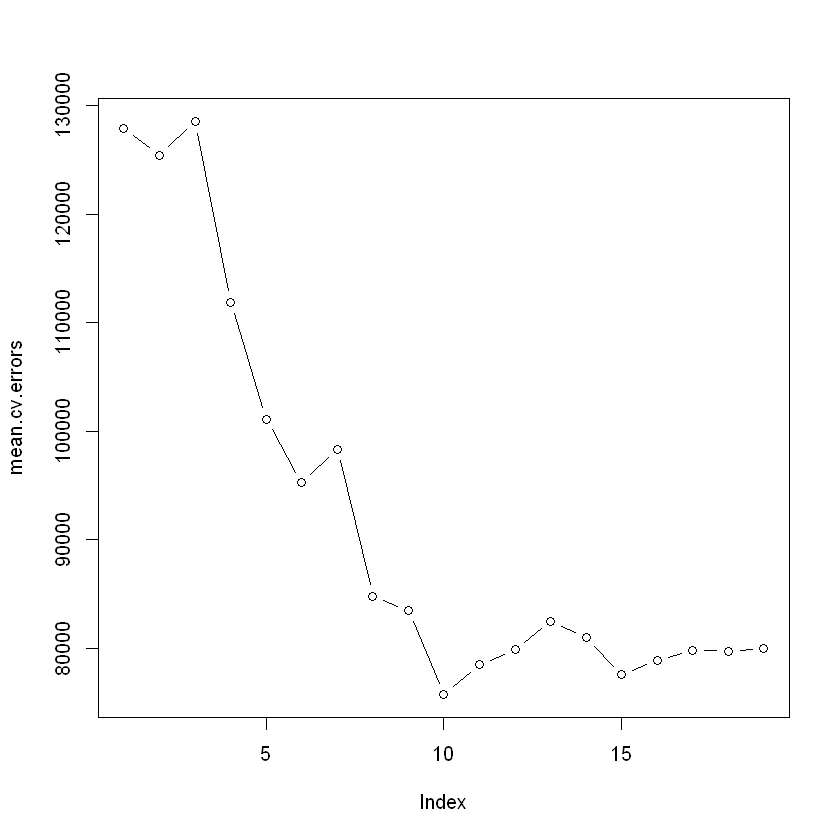

In [15]:
mean.cv.errors <- apply(cv.errors, 2, mean)
mean.cv.errors
par(mfrow = c(1, 1))
plot(mean.cv.errors, type = "b")